# Summer precipitation anomaly detection using Autoencoder

In [1]:
import xarray as xr
import os
import glob
import pickle
import pandas as pd
import numpy as np
import scipy.stats
from turtle import width
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import transform
from minisom import MiniSom
from scipy.spatial import distance
from cnmaps import get_map, draw_map, clip_contours_by_map
import proplot as pplt

import matplotlib.pyplot as plt
import cmaps

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from pyimagesearch.convautoencoder import ConvAutoencoder

os.chdir('/Users/zeqinhuang/Documents/paper/anomalous_PREC')

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
models = [
    'ACCESS-CM2','ACCESS-ESM1-5','BCC-CSM2-MR','CESM2-WACCM','CESM2','CMCC-CM2-SR5','CMCC-ESM2','CNRM-CM6-1','CNRM-ESM2-1','CanESM5',
    'EC-Earth3-Veg-LR','EC-Earth3','FGOALS-g3','GFDL-CM4','GFDL-CM4_gr2','GFDL-ESM4','GISS-E2-1-G','HadGEM3-GC31-LL','HadGEM3-GC31-MM',
    'IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','KACE-1-0-G','KIOST-ESM','MIROC-ES2L','MIROC6','MPI-ESM1-2-HR','MPI-ESM1-2-LR',
    'MRI-ESM2-0','NESM3','NorESM2-LM','NorESM2-MM','TaiESM1','UKESM1-0-LL']


In [3]:
## compute MSE error
def comp_error(images, autoencoder):
    time_max,_,_,_ = np.shape(images)
    errors_ = np.zeros(time_max)
    recons_ = autoencoder.predict_on_batch(images)
    for tt in range(time_max):
        errors_[tt] = np.mean((images[tt] - recons_[tt])**2)
    del(recons_)
    return errors_

def pad_remover(rdata,multidata=False):
    ndim = rdata.ndim
    if ndim==4:
        if multidata:
            recon = rdata[:,1:-2,2:-3,0] # padwidth1 = ((0,0),(1,2),(2,3))
        else:
            recon = rdata[0,1:-2,2:-3,0]
    elif ndim==3:
        recon = rdata[1:-2,2:-3,0]

    return recon

###############  MPI-ESM1-2-LR  ###############
Epoch 1/20


2022-12-13 09:37:22.940146: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


322/322 [==============================] - 62s 190ms/step - loss: 0.0139 - val_loss: 0.0128
Epoch 2/20
322/322 [==============================] - 58s 181ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 3/20
322/322 [==============================] - 60s 186ms/step - loss: 0.0026 - val_loss: 0.0015
Epoch 4/20
322/322 [==============================] - 57s 176ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/20
322/322 [==============================] - 60s 187ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/20
322/322 [==============================] - 58s 180ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/20
322/322 [==============================] - 57s 177ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/20
322/322 [==============================] - 57s 178ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/20
322/322 [==============================] - 58s 181ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/20
322/322 [==============================] - 57s 178ms/step - loss: 0.0011

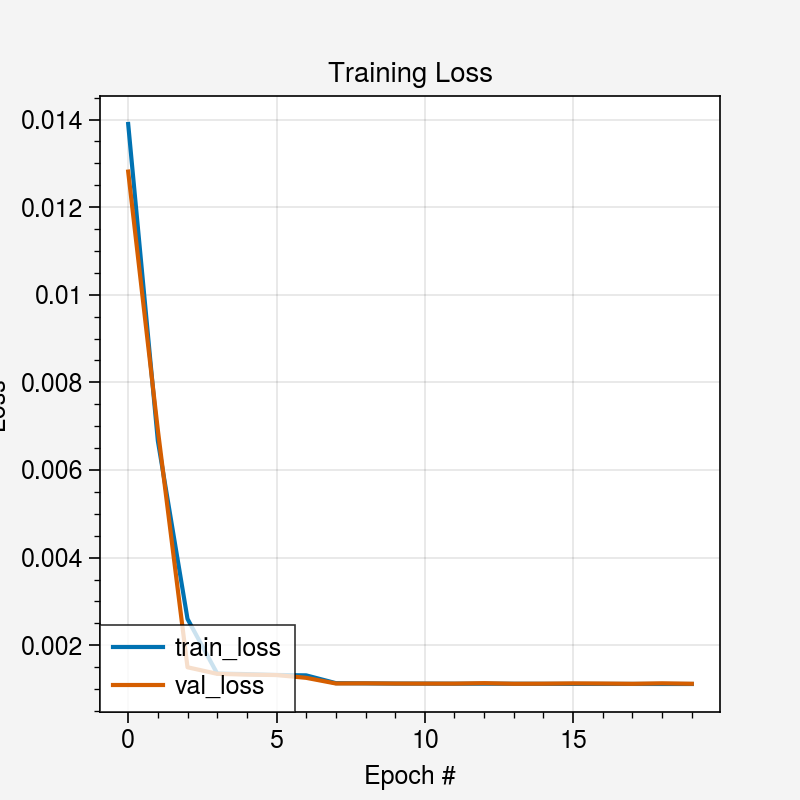




###############  MRI-ESM2-0  ###############
Epoch 1/20
322/322 [==============================] - 59s 181ms/step - loss: 0.0129 - val_loss: 0.0115
Epoch 2/20
322/322 [==============================] - 59s 184ms/step - loss: 0.0063 - val_loss: 0.0082
Epoch 3/20
322/322 [==============================] - 59s 182ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 4/20
322/322 [==============================] - 60s 188ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 5/20
322/322 [==============================] - 60s 186ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 6/20
322/322 [==============================] - 57s 178ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 7/20
322/322 [==============================] - 58s 180ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 8/20
322/322 [==============================] - 61s 189ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/20
322/322 [==============================] - 59s 183ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/20
322/322 [====

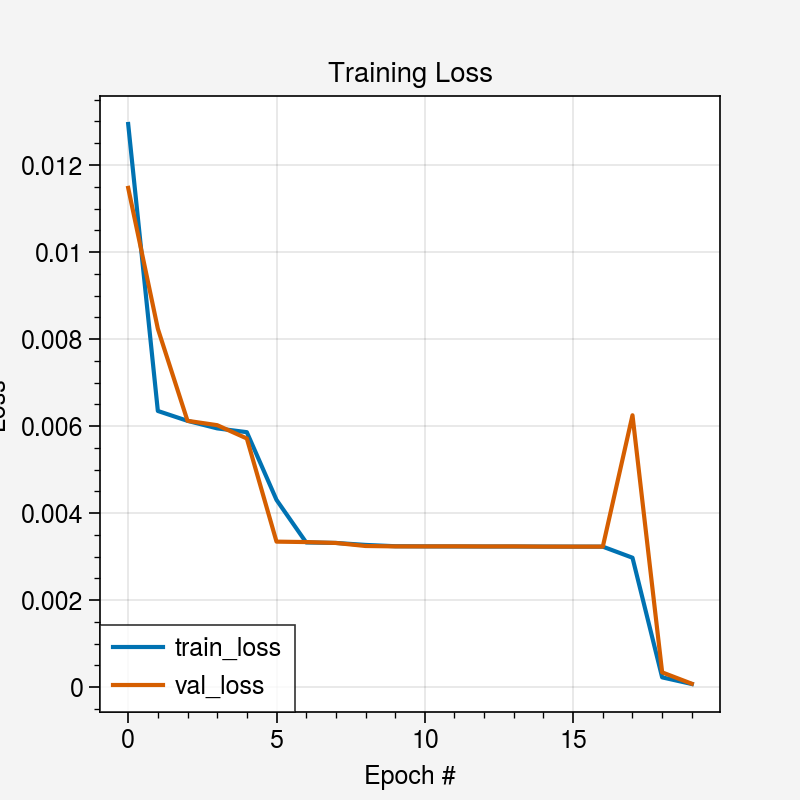




###############  NESM3  ###############
Epoch 1/20
322/322 [==============================] - 58s 178ms/step - loss: 0.0066 - val_loss: 0.0016
Epoch 2/20
322/322 [==============================] - 61s 188ms/step - loss: 1.7631e-04 - val_loss: 4.6185e-04
Epoch 3/20
322/322 [==============================] - 64s 198ms/step - loss: 8.8594e-05 - val_loss: 7.6215e-05
Epoch 4/20
322/322 [==============================] - 58s 179ms/step - loss: 6.3906e-05 - val_loss: 6.9202e-05
Epoch 5/20
322/322 [==============================] - 58s 179ms/step - loss: 5.0306e-05 - val_loss: 5.0951e-05
Epoch 6/20
322/322 [==============================] - 57s 178ms/step - loss: 4.2232e-05 - val_loss: 4.1055e-05
Epoch 7/20
322/322 [==============================] - 60s 185ms/step - loss: 3.7204e-05 - val_loss: 3.3951e-05
Epoch 8/20
322/322 [==============================] - 57s 179ms/step - loss: 3.4659e-05 - val_loss: 4.8133e-05
Epoch 9/20
322/322 [==============================] - 57s 176ms/step - loss: 

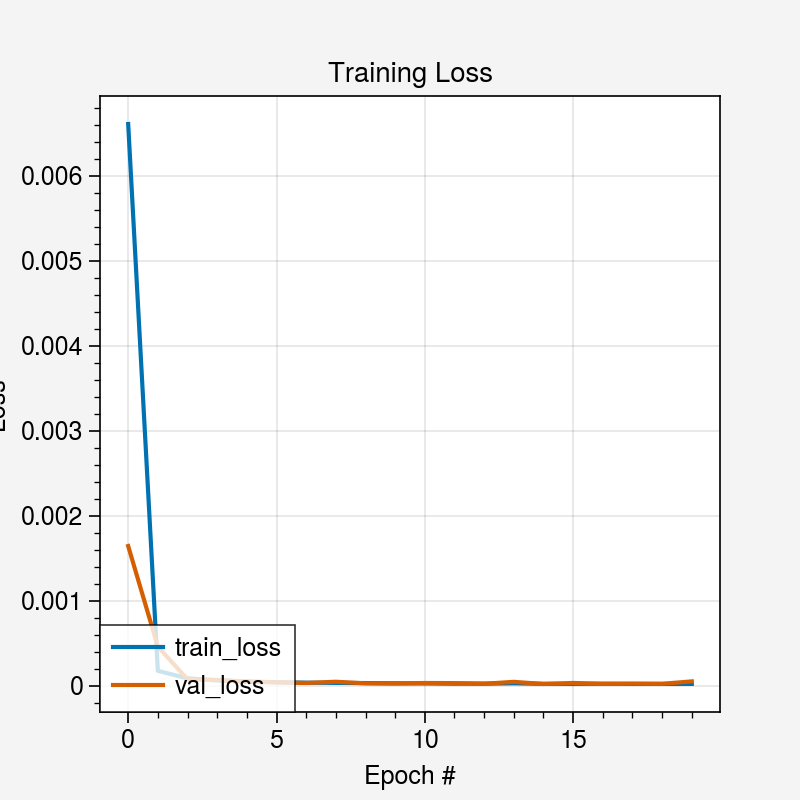




###############  NorESM2-LM  ###############
Epoch 1/20
322/322 [==============================] - 67s 203ms/step - loss: 0.0076 - val_loss: 0.0043
Epoch 2/20
322/322 [==============================] - 59s 183ms/step - loss: 1.5968e-04 - val_loss: 3.4263e-04
Epoch 3/20
322/322 [==============================] - 61s 188ms/step - loss: 7.9007e-05 - val_loss: 6.8616e-05
Epoch 4/20
322/322 [==============================] - 60s 186ms/step - loss: 5.5357e-05 - val_loss: 5.0675e-05
Epoch 5/20
322/322 [==============================] - 61s 189ms/step - loss: 4.3430e-05 - val_loss: 3.5992e-05
Epoch 6/20
322/322 [==============================] - 60s 187ms/step - loss: 3.6520e-05 - val_loss: 3.3476e-05
Epoch 7/20
322/322 [==============================] - 59s 184ms/step - loss: 3.1453e-05 - val_loss: 4.1721e-05
Epoch 8/20
322/322 [==============================] - 59s 185ms/step - loss: 3.9299e-05 - val_loss: 5.1865e-05
Epoch 9/20
322/322 [==============================] - 59s 182ms/step - l

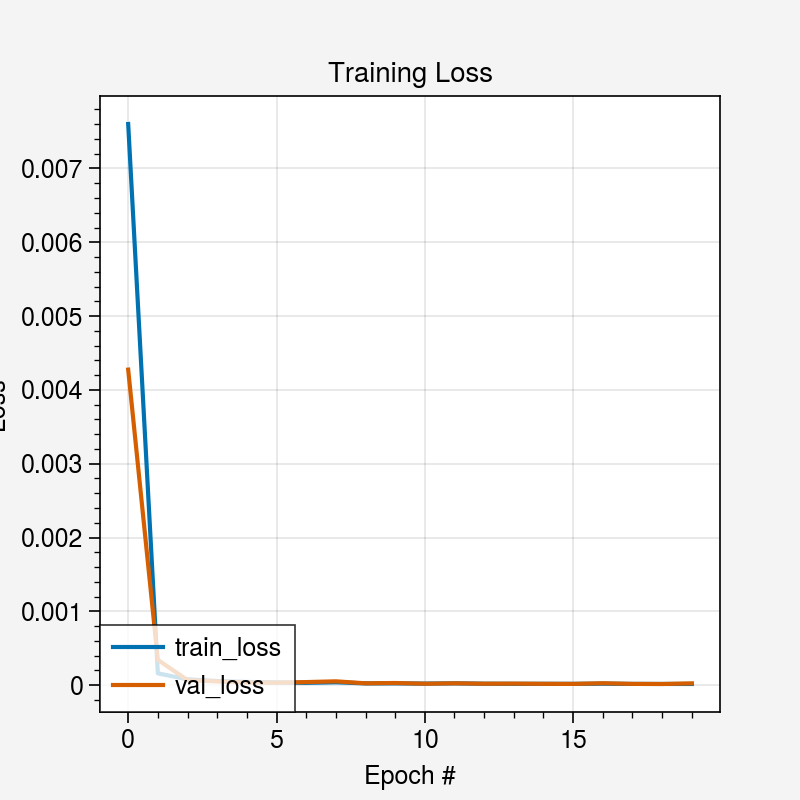




###############  NorESM2-MM  ###############
Epoch 1/20
322/322 [==============================] - 64s 198ms/step - loss: 0.0085 - val_loss: 0.0015
Epoch 2/20
322/322 [==============================] - 62s 194ms/step - loss: 2.5684e-04 - val_loss: 4.9432e-04
Epoch 3/20
322/322 [==============================] - 65s 203ms/step - loss: 1.2178e-04 - val_loss: 1.0235e-04
Epoch 4/20
322/322 [==============================] - 60s 185ms/step - loss: 7.8179e-05 - val_loss: 6.9428e-05
Epoch 5/20
322/322 [==============================] - 59s 185ms/step - loss: 6.5527e-05 - val_loss: 5.5873e-05
Epoch 6/20
322/322 [==============================] - 59s 185ms/step - loss: 5.3716e-05 - val_loss: 5.2515e-05
Epoch 7/20
322/322 [==============================] - 60s 186ms/step - loss: 4.9400e-05 - val_loss: 4.7890e-05
Epoch 8/20
322/322 [==============================] - 59s 184ms/step - loss: 4.2970e-05 - val_loss: 4.0526e-05
Epoch 9/20
322/322 [==============================] - 59s 183ms/step - l

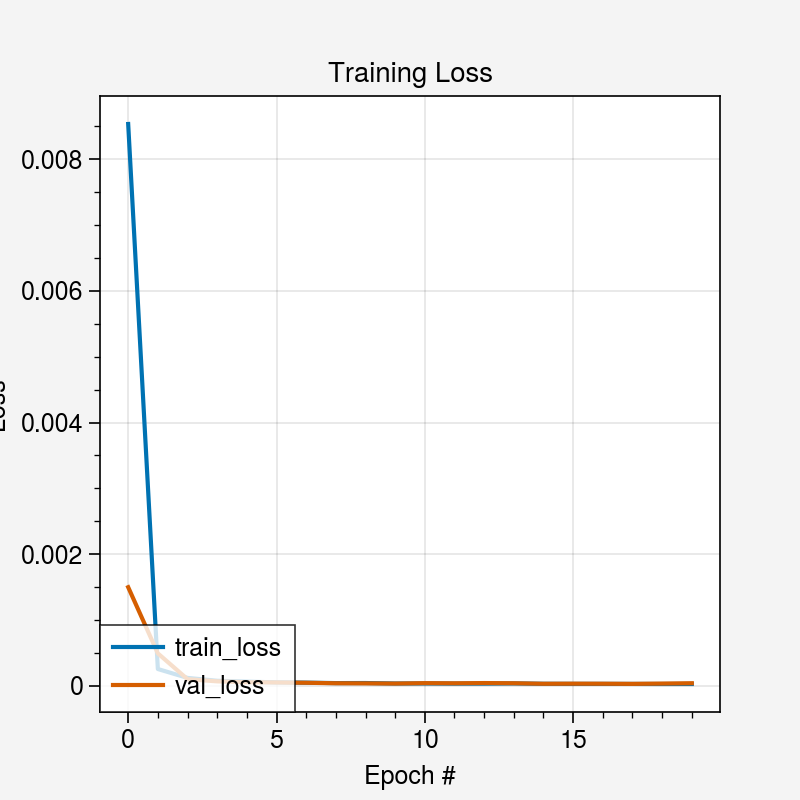




###############  TaiESM1  ###############
Epoch 1/20
322/322 [==============================] - 64s 197ms/step - loss: 0.0143 - val_loss: 0.0065
Epoch 2/20
322/322 [==============================] - 60s 187ms/step - loss: 0.0028 - val_loss: 6.7125e-04
Epoch 3/20
322/322 [==============================] - 60s 186ms/step - loss: 1.3728e-04 - val_loss: 1.4437e-04
Epoch 4/20
322/322 [==============================] - 59s 182ms/step - loss: 1.0210e-04 - val_loss: 1.3923e-04
Epoch 5/20
322/322 [==============================] - 59s 184ms/step - loss: 6.4808e-05 - val_loss: 6.4017e-05
Epoch 6/20
322/322 [==============================] - 59s 184ms/step - loss: 5.3100e-05 - val_loss: 7.1965e-05
Epoch 7/20
322/322 [==============================] - 59s 182ms/step - loss: 4.7105e-05 - val_loss: 4.6922e-05
Epoch 8/20
322/322 [==============================] - 59s 184ms/step - loss: 4.2255e-05 - val_loss: 4.9180e-05
Epoch 9/20
322/322 [==============================] - 60s 185ms/step - loss: 3.

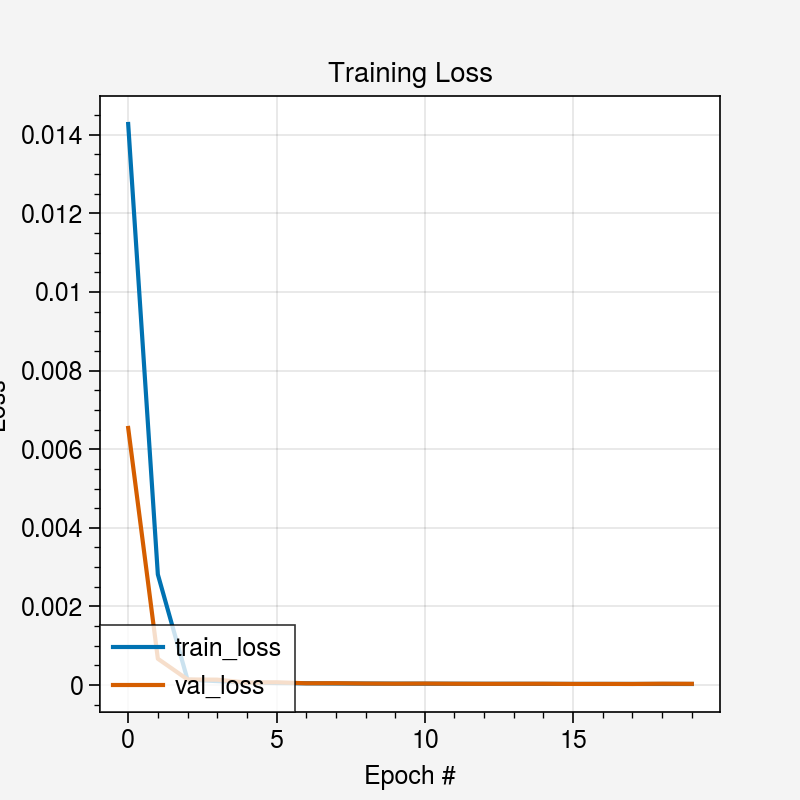




###############  UKESM1-0-LL  ###############
Epoch 1/20
315/315 [==============================] - 60s 188ms/step - loss: 0.0097 - val_loss: 0.0031
Epoch 2/20
315/315 [==============================] - 55s 176ms/step - loss: 4.6126e-04 - val_loss: 6.8061e-04
Epoch 3/20
315/315 [==============================] - 56s 178ms/step - loss: 1.3529e-04 - val_loss: 1.1369e-04
Epoch 4/20
315/315 [==============================] - 56s 178ms/step - loss: 1.0144e-04 - val_loss: 9.7231e-05
Epoch 5/20
315/315 [==============================] - 56s 177ms/step - loss: 7.9969e-05 - val_loss: 7.5989e-05
Epoch 6/20
315/315 [==============================] - 56s 177ms/step - loss: 6.8769e-05 - val_loss: 6.8169e-05
Epoch 7/20
315/315 [==============================] - 56s 179ms/step - loss: 6.2706e-05 - val_loss: 5.6605e-05
Epoch 8/20
315/315 [==============================] - 59s 186ms/step - loss: 5.5525e-05 - val_loss: 5.5156e-05
Epoch 9/20
315/315 [==============================] - 60s 190ms/step - 

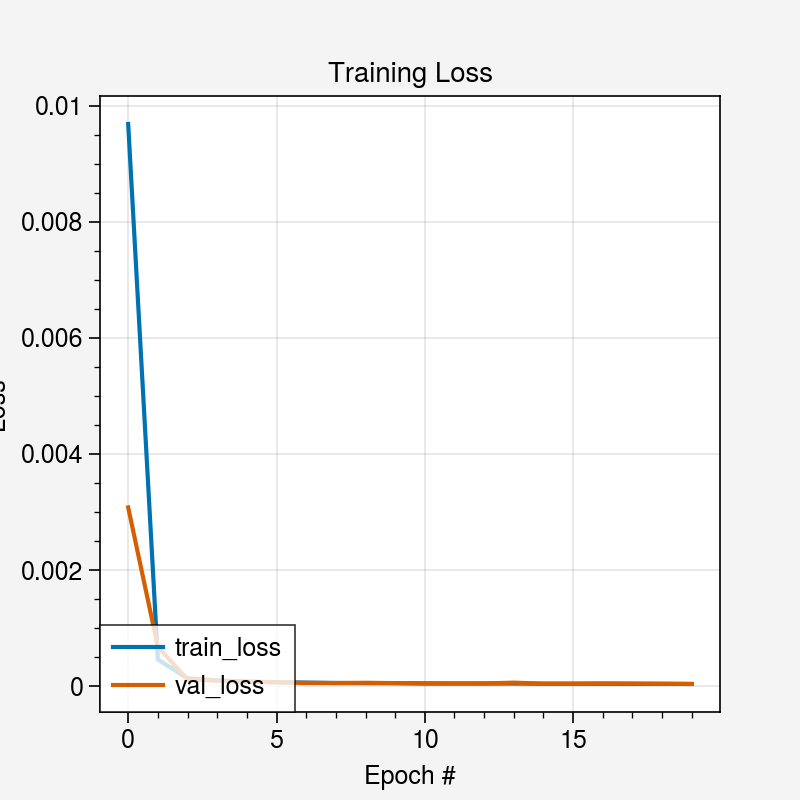

In [4]:
# create mask for ploting
for m in models:
    # m = models[0]
    if os.path.exists('autoencoder/processed_data/autoencoder_trained_summer_' + m + '_1981_2015_fixed.model'):
        continue
    else:
        print('#'*15 + '  ' + m + '  ' + '#'*15)

        # date for training
        ts = pd.date_range(start='1961-01-01',end='2099-12-31',freq='D')
        ts = ts.strftime('%Y%m%d')
        dates = pd.to_datetime(ts, format='%Y%m%d')
        dates_summer = dates[((dates.month > 4) & (dates.month < 11))]            

        prec_ano = xr.open_dataarray('output/pr_' + m + '_1961_2099_fixed_anomalies.nc',decode_times=False)
        if len(prec_ano) != len(dates_summer):
            dates_summer = dates_summer[dates_summer.day != 31]
        prec_ano['time'] = dates_summer
        prec_ano = prec_ano.sel(time = slice('1981','2015'))

        mask = prec_ano.values[0]
        mask[~np.isnan(mask)] = 1
        lons = prec_ano['lon']
        lats = prec_ano['lat']

        ### set miss values as zeros
        prec_ano = prec_ano.values
        prec_ano = np.nan_to_num(prec_ano, copy=True, nan=0)

        ### Normalize
        minvalue = prec_ano.min()
        maxvalue = prec_ano.max()
        prec_norm = (prec_ano.squeeze() - minvalue)/(maxvalue - minvalue)

        ### padding for training
        padwidth1 = ((0,0),(1,1),(2,3))
        prec_norm_img_list = np.pad(prec_norm, pad_width=padwidth1,mode='constant',constant_values=0)
        prec_norm_img_list = np.expand_dims(prec_norm_img_list, axis=-1)
        time_max, lat_max, lon_max, zmax = np.shape(prec_norm_img_list)

        ### split training and testing data
        train_data, test_data, = train_test_split(prec_norm_img_list, test_size=0.2, random_state=1)

        ### initialize deep learning parameters
        EPOCHS = 20
        INIT_LR = 1e-3
        BS = 16

        ### construct convolutional autoencoder
        (encoder, decoder, autoencoder) = ConvAutoencoder.build(width=lon_max,height=lat_max,depth=zmax,filters=(32,64,128),latentDim=64)
        opt = Adam(learning_rate=INIT_LR,decay=INIT_LR/EPOCHS)
        autoencoder.compile(loss='mse',optimizer=opt)

        ### train the convolutional autoencoder
        H = autoencoder.fit(
            train_data,train_data,
            validation_data=(test_data,test_data),
            epochs=EPOCHS,
            batch_size=BS
        )

        ### Loss function plot
        N = np.arange(0,20)
        plt.plot(N, H.history["loss"], label="train_loss")
        plt.plot(N, H.history["val_loss"], label="val_loss")
        plt.title("Training Loss")
        plt.xlabel("Epoch #")
        plt.ylabel("Loss")
        plt.legend(loc="lower left")
        plt.show()

        ### Save trained autoencoder model
        autoencoder.save('autoencoder/processed_data/autoencoder_trained_summer_' + m + '_1981_2015_fixed.model',save_format='h5')

        ### compute MSE error
        errors = comp_error(prec_norm_img_list, autoencoder)

        errors_all = []
        for i in range(len(prec_norm_img_list)//100+1):
            if i != len(prec_norm_img_list)//100:
                errors = comp_error(prec_norm_img_list[i*100:i*100+100], autoencoder)
            else:
                errors = comp_error(prec_norm_img_list[i*100:], autoencoder)
            errors_all = errors_all + errors.tolist()
            
        ### save error
        with open('autoencoder/processed_data/error_' + m + '_1981_2015_fixed.pickle', mode="wb") as f:
            pickle.dump(errors_all, f)

        print('\n\n')